#Import Library

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load Dataset

In [2]:
df = pd.read_csv('/content/ObesityDataSet.csv')

In [3]:
df.head()

,Age,Gender,Height,Weight,CALC,FAVC,FCVC,NCP,SCC,SMOKE,CH2O,family_history_with_overweight,FAF,TUE,CAEC,MTRANS,NObeyesdad
0,21,Female,1.62,64,no,no,2,3,no,no,2,yes,0,1,Sometimes,Public_Transportation,Normal_Weight
1,21,Female,1.52,56,Sometimes,no,3,3,yes,yes,3,yes,3,0,Sometimes,Public_Transportation,Normal_Weight
2,23,Male,1.8,77,Frequently,no,2,3,no,no,2,yes,2,1,Sometimes,Public_Transportation,Normal_Weight
3,27,Male,1.8,87,Frequently,no,3,3,no,no,2,no,2,0,Sometimes,Walking,Overweight_Level_I
4,22,Male,1.78,89.8,Sometimes,no,2,1,no,no,2,no,0,0,Sometimes,Public_Transportation,Overweight_Level_II


# Identify the shape of dataset

In [4]:
df.shape

(2111, 17)

# list of columns



In [5]:
df.columns

Index(['Age', 'Gender', 'Height', 'Weight', 'CALC', 'FAVC', 'FCVC', 'NCP',
       'SCC', 'SMOKE', 'CH2O', 'family_history_with_overweight', 'FAF', 'TUE',
       'CAEC', 'MTRANS', 'NObeyesdad'],
      dtype='object')

# Basic dataset information

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2111 entries, 0 to 2110
Data columns (total 17 columns):
 #   Column                          Non-Null Count  Dtype 
---  ------                          --------------  ----- 
 0   Age                             2097 non-null   object
 1   Gender                          2102 non-null   object
 2   Height                          2099 non-null   object
 3   Weight                          2100 non-null   object
 4   CALC                            2106 non-null   object
 5   FAVC                            2100 non-null   object
 6   FCVC                            2103 non-null   object
 7   NCP                             2099 non-null   object
 8   SCC                             2101 non-null   object
 9   SMOKE                           2106 non-null   object
 10  CH2O                            2105 non-null   object
 11  family_history_with_overweight  2098 non-null   object
 12  FAF                             2103 non-null   

# Identify missing values

In [7]:
print(df.dtypes)

Age                               object
Gender                            object
Height                            object
Weight                            object
CALC                              object
FAVC                              object
FCVC                              object
NCP                               object
SCC                               object
SMOKE                             object
CH2O                              object
family_history_with_overweight    object
FAF                               object
TUE                               object
CAEC                              object
MTRANS                            object
NObeyesdad                        object
dtype: object


In [8]:
print(df.isnull().sum())

Age                               14
Gender                             9
Height                            12
Weight                            11
CALC                               5
FAVC                              11
FCVC                               8
NCP                               12
SCC                               10
SMOKE                              5
CH2O                               6
family_history_with_overweight    13
FAF                                8
TUE                                9
CAEC                              11
MTRANS                             6
NObeyesdad                         0
dtype: int64


In [9]:
for col in df.columns:
    print(f"Kolom: {col} - Jumlah Nilai Unik: {df[col].nunique()}")
    print(f"Nilai unik: {df[col].unique()}")
    print("-" * 40)

Kolom: Age - Jumlah Nilai Unik: 1394
Nilai unik: ['21' '23' '27' ... '22.524036' '24.361936' '23.664709']
----------------------------------------
Kolom: Gender - Jumlah Nilai Unik: 3
Nilai unik: ['Female' 'Male' '?' nan]
----------------------------------------
Kolom: Height - Jumlah Nilai Unik: 1562
Nilai unik: ['1.62' '1.52' '1.8' ... '1.752206' '1.73945' '1.738836']
----------------------------------------
Kolom: Weight - Jumlah Nilai Unik: 1518
Nilai unik: ['64' '56' '77' ... '133.689352' '133.346641' '133.472641']
----------------------------------------
Kolom: CALC - Jumlah Nilai Unik: 5
Nilai unik: ['no' 'Sometimes' 'Frequently' '?' 'Always' nan]
----------------------------------------
Kolom: FAVC - Jumlah Nilai Unik: 3
Nilai unik: ['no' 'yes' '?' nan]
----------------------------------------
Kolom: FCVC - Jumlah Nilai Unik: 808
Nilai unik: ['2' '3' '1' nan '?' '8.148992744163786' '8.42397392777979' '2.450218'
 '2.880161' '2.00876' '2.596579' '2.591439' '2.392665' '1.123939'
 

# EDA

In [10]:
# Mengecek missing values
df.isnull().sum()

,0
Age,14
Gender,9
Height,12
Weight,11
CALC,5
FAVC,11
FCVC,8
NCP,12
SCC,10
SMOKE,5


In [11]:
# Mengcek Duplikat
df.duplicated().sum()

np.int64(18)

In [12]:
# Mengecek Nilai Unik
df.nunique()

,0
Age,1394
Gender,3
Height,1562
Weight,1518
CALC,5
FAVC,3
FCVC,808
NCP,637
SCC,3
SMOKE,3


In [13]:
# Konversi Kolom ke Numerik
numeric_cols = ['Age', 'Height', 'Weight', 'FCVC', 'NCP', 'CH2O', 'FAF', 'TUE']
df[numeric_cols] = df[numeric_cols].apply(pd.to_numeric, errors='coerce')

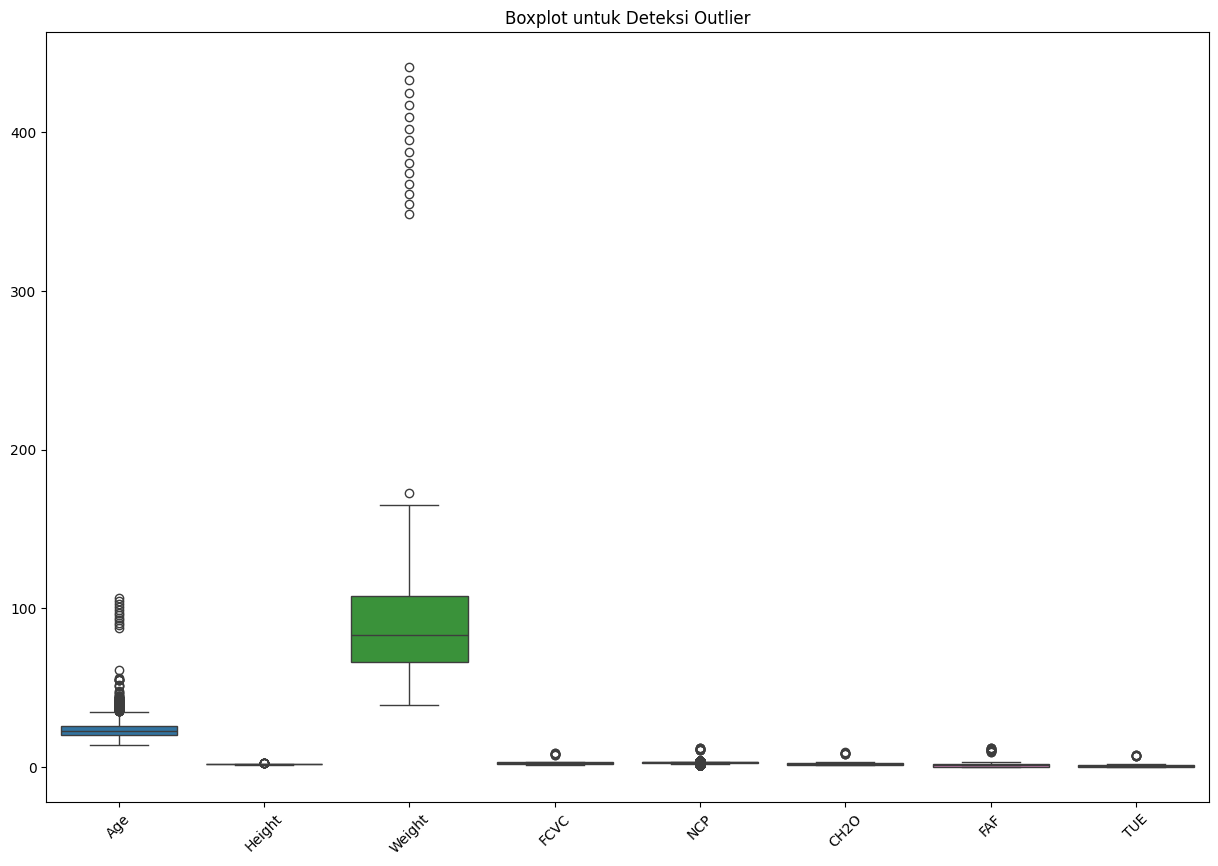

In [14]:
# Visualisasi Boxplot untuk Outlier
plt.figure(figsize=(15, 10))
sns.boxplot(data=df[numeric_cols])
plt.xticks(rotation=45)
plt.title("Boxplot untuk Deteksi Outlier")
plt.show()

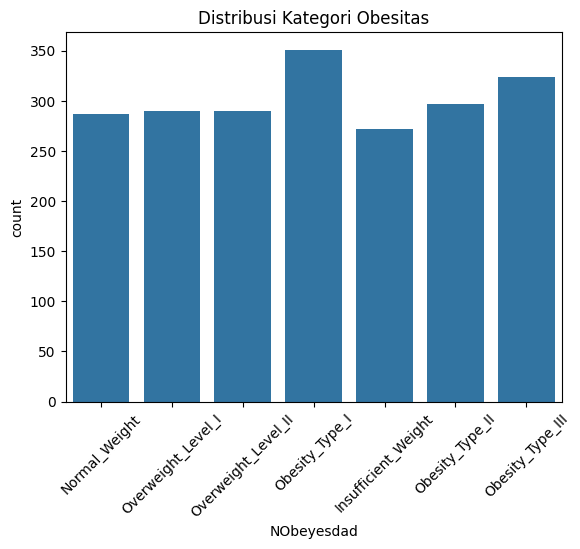

In [15]:
# Visualisasi Kelas Target
sns.countplot(x='NObeyesdad', data=df)
plt.xticks(rotation=45)
plt.title("Distribusi Kategori Obesitas")
plt.show()

In [16]:
# Menangani Missing Values & Tipe Data
df.replace(['?', ' ', 'NA', 'na', 'NaN'], np.nan, inplace=True)
df.drop_duplicates(inplace=True)

In [17]:
# Mengubah kolom numerik ke float
numeric_cols = ['Age', 'Height', 'Weight', 'FCVC', 'NCP', 'CH2O', 'FAF', 'TUE']
for col in numeric_cols:
    df[col] = pd.to_numeric(df[col], errors='coerce')

In [18]:
# Drop rows with missing values
df.dropna(inplace=True)

# Tangani Outlier (gunakan IQR method)
for col in numeric_cols:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower = Q1 - 1.5 * IQR
    upper = Q3 + 1.5 * IQR
    df = df[(df[col] >= lower) & (df[col] <= upper)]

In [20]:
# Mengubahbah Data Kategori Menjadi Numerik

# Import LabelEncoder
from sklearn.preprocessing import LabelEncoder

categorical_cols = df.select_dtypes(include='object').columns.tolist()
categorical_cols.remove('NObeyesdad')  # ini target

label_encoders = {}
for col in categorical_cols:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col])
    label_encoders[col] = le

In [21]:
# Encode label (target)
target_encoder = LabelEncoder()
df['NObeyesdad'] = target_encoder.fit_transform(df['NObeyesdad'])

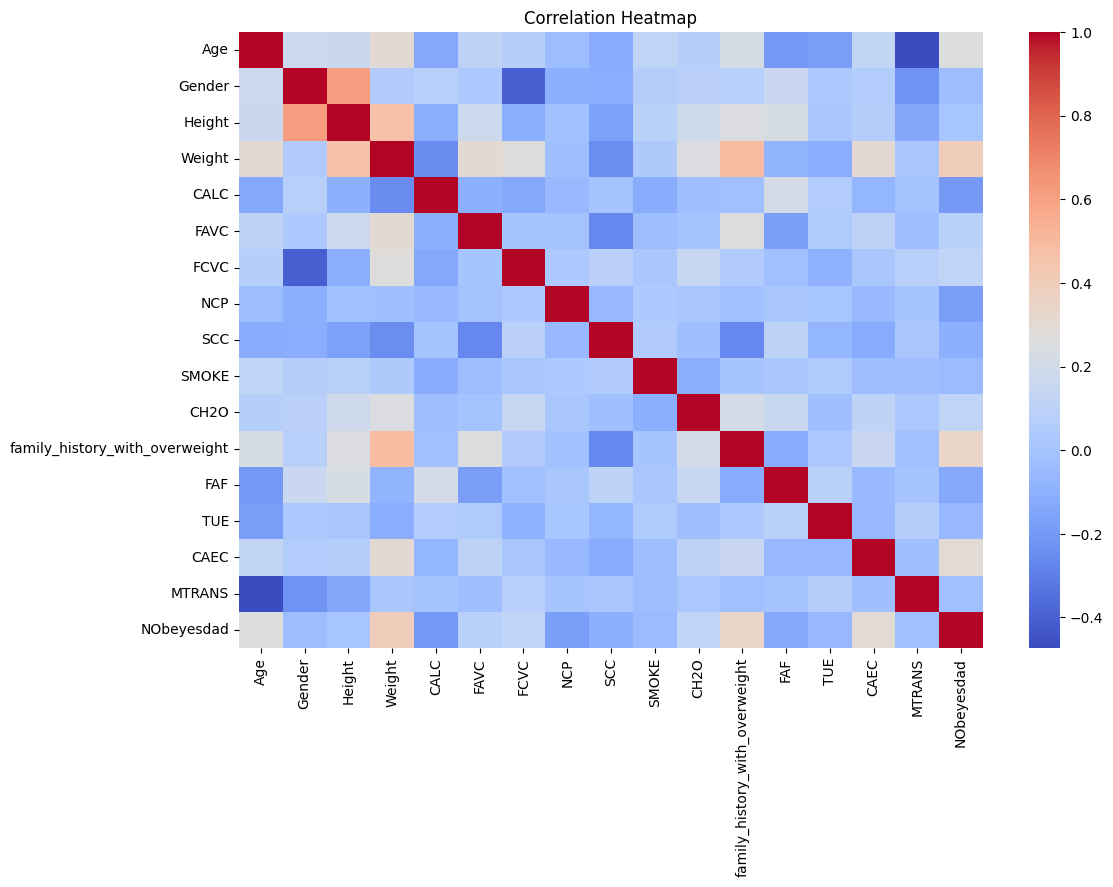

In [22]:
# Mengecek Korelasi dan Seleksi Fitur
plt.figure(figsize=(12, 8))
sns.heatmap(df.corr(), annot=False, cmap='coolwarm')
plt.title("Correlation Heatmap")
plt.show()

In [23]:
# Seleksi fitur berdasarkan korelasi
X = df.drop(columns=['NObeyesdad'])  # fitur
y = df['NObeyesdad']  # target

In [25]:
# Mengatasi Ketidakseimbangan Kelas dengan SMOTE
# Import SMOTE
!pip install imblearn
from imblearn.over_sampling import SMOTE

smote = SMOTE(random_state=42)
X_balanced, y_balanced = smote.fit_resample(X, y)

In [27]:
# Normalisasi Data
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_balanced)

In [28]:
print("Jumlah sampel setelah SMOTE:", len(y_balanced))
print("Distribusi kelas:\n", pd.Series(y_balanced).value_counts())

Jumlah sampel setelah SMOTE: 1820
Distribusi kelas:
 NObeyesdad
1    260
5    260
2    260
6    260
3    260
0    260
4    260
Name: count, dtype: int64
